In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [3]:
#READ IN DATA IN DATAFRAMES
annotations = pd.read_table('data/ec_annotations_single.tab')

training = pd.read_table('data/train_set.fasta', sep='\n', skiprows=lambda x: (x != 0) and not x % 2)

validation = pd.read_table('data/val_set.fasta', sep='\n', skiprows=lambda x: (x != 0) and not x % 2)

test = pd.read_table('data/test_set.fasta', sep='\n', skiprows=lambda x: (x != 0) and not x % 2)
test.head()

,Test Set
0,>Q9ES89
1,>Q95UN8
2,>E8MF11
3,>Q2YQS9
4,>P11274


In [4]:
#Size of data sets
train_size = training.shape[0]
val_size = validation.shape[0]
test_size = test.shape[0]
total = train_size + test_size + val_size
print(f"Train: {train_size}, Val: {val_size}, Test: {test_size}")
print(f"Total: {total}")
print(f"Train Percentage: {(train_size/total)*100}, Val Percentage: {(val_size/total)*100}, Test Percentage: {(test_size/total)*100} ")

Train: 59594, Val: 400, Test: 600
Total: 60594
Train Percentage: 98.34967158464535, Val Percentage: 0.6601313661418622, Test Percentage: 0.9901970492127934 


In [5]:
annotations.head()

,Entry,EC_number
0,Q9SLF3,3.6.5.-
1,Q0KHQ5,2.7.11.1
2,Q8RWV0,2.2.1.1
3,P9WG25,2.2.1.1
4,P82281,1.-.-.-


In [6]:
validation['Validation set'] = validation['Validation set'].str[1:]
training['Train set'] = training['Train set'].str[1:]
test['Test Set'] = test['Test Set'].str[1:]
training.head()

,Train set
0,O15231
1,O66406
2,P34509
3,O31933
4,O31923


In [38]:
counts = np.array([train_size, val_size, test_size])
counts_df = pd.DataFrame(data=counts, index=["training", "validation", "test"], columns=["Number of Proteins"])
counts_df.head()

,Number of Proteins
training,59594
validation,400
test,600


[Text(0.5, 1.0, 'Datasets Distribution')]

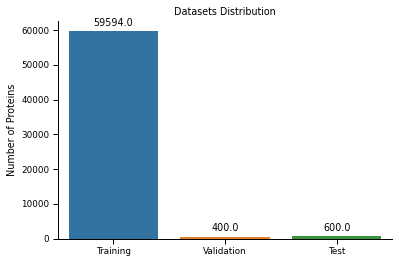

In [43]:
#visual for size of datasets


sns.set_context("paper")
g = sns.barplot(x=['Training', 'Validation', 'Test'], y='Number of Proteins', data=counts_df, ci=None)
for p in g.patches:
    g.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
sns.despine()
g.set(title="Datasets Distribution")

In [9]:
#VALIDATION enzyme vs non enzyme
proteins = set(annotations['Entry'])

current = validation['Validation set']
val_enzymes = np.array([])
for i in range(len(current)):
    if current.loc[i] in proteins:
        val_enzymes = np.append(val_enzymes, current.loc[i])
#print(val_enzymes)

current = training['Train set']
train_enzymes = np.array([])
for i in range(len(current)):
    if current.loc[i] in proteins:
        train_enzymes = np.append(train_enzymes, current.loc[i])

current = test['Test Set']
test_enzymes = np.array([])
for i in range(len(current)):
    if current.loc[i] in proteins:
        test_enzymes = np.append(test_enzymes, current.loc[i])

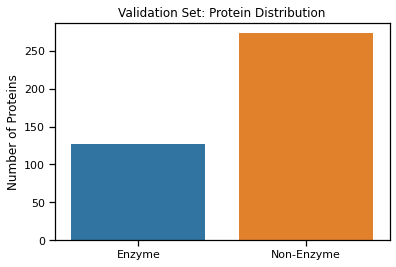

In [34]:
#VALIDATION enzyme vs non enzyme
val_negative = np.array([len(val_enzymes), (val_size-len(val_enzymes))])
df1 = pd.DataFrame(data=val_negative, index = ['Enzyme', 'Non-Enzyme'], columns = ['Number of Proteins'])
sns.set_context("notebook")
g1 = sns.barplot(x=['Enzyme', 'Non-Enzyme'], y = 'Number of Proteins', data = df1, ci=None).set(title="Validation Set: Protein Distribution")


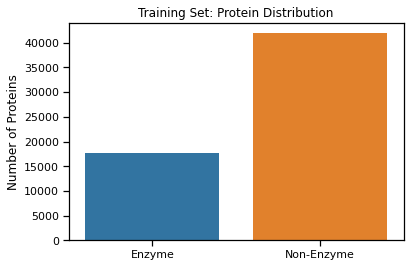

In [36]:
#TRAINING
train_negative = np.array([len(train_enzymes), (train_size-len(train_enzymes))])
df2 = pd.DataFrame(data=train_negative, index = ['Enzyme', 'Non-Enzyme'], columns = ['Number of Proteins'])
sns.set_context("notebook")
g2 = sns.barplot(x=['Enzyme', 'Non-Enzyme'], y = 'Number of Proteins', data = df2, ci=None).set(title="Training Set: Protein Distribution")

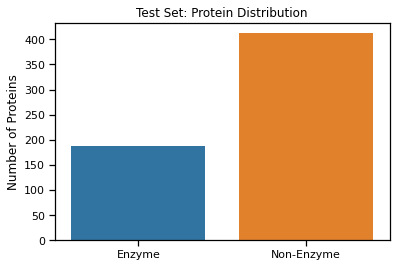

In [37]:
#TEST
test_negative = np.array([len(test_enzymes), (test_size-len(test_enzymes))])
df3 = pd.DataFrame(data=test_negative, index = ['Enzyme', 'Non-Enzyme'], columns = ['Number of Proteins'])
sns.set_context("notebook")
g3 = sns.barplot(x=['Enzyme', 'Non-Enzyme'], y = 'Number of Proteins', data = df3, ci=None).set(title="Test Set: Protein Distribution")

In [13]:
annot_dict = pd.Series(annotations.EC_number.values, index = annotations.Entry).to_dict()

In [14]:
#VALIDATION label distribution in 6 1st level ec classes
val_classes = {1: 0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}
none = 0
for i in range(len(val_enzymes)):
    curr = annot_dict[val_enzymes[i]]
    if curr[0] == '1':
        val_classes[1] +=1
    elif curr[0] == '2':
        val_classes[2] +=1
    elif curr[0] == '3':
        val_classes[3] +=1
    elif curr[0] == '4':
        val_classes[4] +=1
    elif curr[0] == '5':
        val_classes[5] +=1
    elif curr[0] == '6':
        val_classes[6] +=1
    elif curr[0] == '7':
        val_classes[7] +=1
    else:
        none +=1


In [20]:
print(val_classes)
print(none)

{1: 26, 2: 46, 3: 32, 4: 12, 5: 7, 6: 3, 7: 1}
0


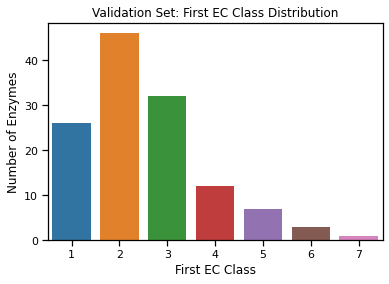

In [33]:
#VALIDATION VISUAL

val_counts = np.fromiter(val_classes.values(), dtype=int)
val_df = pd.DataFrame(data=val_counts, index=['1','2','3','4','5','6','7'], columns=['Number of Enzymes'])
sns.set_context("notebook")
val_g = sns.barplot(x=['1','2','3','4','5','6','7'], y='Number of Enzymes', data=val_df, ci=None).set(title="Validation Set: Enzyme Distribution", xlabel='First EC Class')

In [22]:
#TEST label distribution in 6 1st level ec classes
test_classes = {1: 0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}
none2 = 0
for i in range(len(test_enzymes)):
    curr = annot_dict[test_enzymes[i]]
    if curr[0] == '1':
        test_classes[1] +=1
    elif curr[0] == '2':
        test_classes[2] +=1
    elif curr[0] == '3':
        test_classes[3] +=1
    elif curr[0] == '4':
        test_classes[4] +=1
    elif curr[0] == '5':
        test_classes[5] +=1
    elif curr[0] == '6':
        test_classes[6] +=1
    elif curr[0] == '7':
        test_classes[7] +=1
    else:
        none2 +=1


In [23]:
print(test_classes)
print(none2)

{1: 38, 2: 69, 3: 47, 4: 18, 5: 10, 6: 5, 7: 1}
0


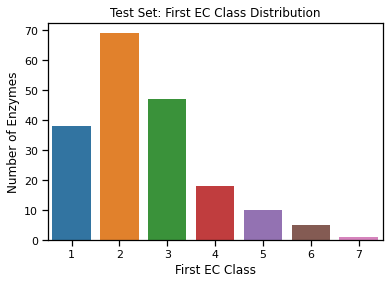

In [32]:
#TEST VISUAL

test_counts = np.fromiter(test_classes.values(), dtype=int)
test_df = pd.DataFrame(data=test_counts, index=['1','2','3','4','5','6','7'], columns=['Number of Enzymes'])
sns.set_context("notebook")
test_g = sns.barplot(x=['1','2','3','4','5','6','7'], y='Number of Enzymes', data=test_df, ci=None).set(title="Test Set: Enzyme Distribution", xlabel='First EC Class')

In [24]:
#TRAIN label distribution in 6 1st level ec classes
train_classes = {1: 0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}
none3 = 0
for i in range(len(train_enzymes)):
    curr = annot_dict[train_enzymes[i]]
    if curr[0] == '1':
        train_classes[1] +=1
    elif curr[0] == '2':
        train_classes[2] +=1
    elif curr[0] == '3':
        train_classes[3] +=1
    elif curr[0] == '4':
        train_classes[4] +=1
    elif curr[0] == '5':
        train_classes[5] +=1
    elif curr[0] == '6':
        train_classes[6] +=1
    elif curr[0] == '7':
        train_classes[7] +=1
    else:
        none3 +=1


{1: 2499, 2: 6099, 3: 5753, 4: 1031, 5: 744, 6: 1172, 7: 366}


In [25]:
print(train_classes)
print(none3)

{1: 2499, 2: 6099, 3: 5753, 4: 1031, 5: 744, 6: 1172, 7: 366}
0


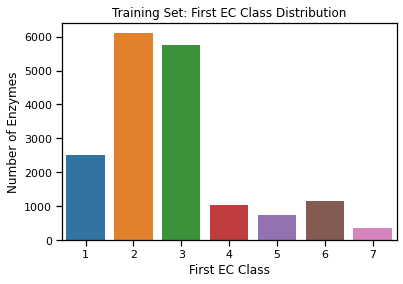

In [30]:
#TRAIN VISUAL

train_counts = np.fromiter(train_classes.values(), dtype=int)
train_df = pd.DataFrame(data=train_counts, index=['1','2','3','4','5','6','7'], columns=['Number of Enzymes'])
sns.set_context("notebook")
train_g = sns.barplot(x=['1','2','3','4','5','6','7'], y='Number of Enzymes', data=train_df, ci=None).set(title="Training Set: Enzyme Distribution", xlabel='First EC Class')